# Part I -(New York Bike Share Data Exploratory Data Analysis)
## by (Hauwa Musa Hameed)

## Introduction
The "New York Bike Sharing" dataset provides information on bike sharing usage in New York. The purpose of this project is to investigate the factors that drive participation in the bike sharing system. The dataset includes information on various attributes such as duration of the trip, longitude and latitude of each station,  start and end time, start and end station names, user type, member gender, bike share type, day of the trip, age, start time hour, and age group. With a total of 183412 observations and 16 attributes, the data provides insights about the usage patterns of the bike sharing system. By analyzing variables such as user type, member gender, and age group, one can determine which demographic segments are most likely to participate in the bike sharing system. The data also provides information on trip duration, start and end time, and day of the week, which can be used to analyze usage patterns and identify peak usage times. 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
# loading my data set
trip_data = pd.read_csv('201902-fordgobike-tripdata.csv')
trip_data.head(100)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [51]:
# number of attributes and observations
trip_data.shape

(174952, 21)

In [50]:
# more infomation on my data set
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_time_hours           174952 non-null int64
end_time_hours     

In [49]:
# checking the descriptive statistics
trip_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_time_hours,end_time_hours,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,13.456165,13.609533,38.196865
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,4.734282,4.748029,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,0.000000,22.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,9.000000,9.000000,31.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,14.000000,14.000000,36.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,17.000000,18.000000,43.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000,23.000000,145.000000


In [48]:
# checking number of null values
trip_data.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_time_hours           0
end_time_hours             0
member_age                 0
age_group                  1
week_day                   0
dtype: int64

In [7]:
# dropping the null values and reseting the rows index
trip_data.dropna( inplace = True)

In [8]:
# setting the start_time, end_time and member_birth_year to date time

trip_data['start_time'] = pd.to_datetime(trip_data['start_time'])
trip_data['end_time'] = pd.to_datetime(trip_data['end_time'])

# changing the end_time and start_time to hours of the day
trip_data['start_time_hours'] = trip_data['start_time'].dt.hour
trip_data['end_time_hours'] = trip_data['end_time'].dt.hour

In [9]:
# creating a column for age
trip_data['member_age'] = 2023 - trip_data['member_birth_year']

In [10]:
# binning the age column

bins = [18, 26, 52, 141]
trip_data['age_group'] = pd.cut(trip_data['member_age'], bins, labels=['Gen Z', 'millennials', 'older Gen'])

In [11]:
# craeating column for the day of the week

trip_data['week_day'] = trip_data['start_time'].dt.day_name() 

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the day names based on the custom list
trip_data['week_day'] = pd.Categorical(trip_data['week_day'], categories=days, ordered=True)


In [12]:
# droping some columns

bikes_data = trip_data.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'])

bikes_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_time_hours           174952 non-null int64
end_time_hours             174952 non-null int64
member_age                 174952 non-null float64
age_group                  174951 non-null category
week_day                   174952 non-null category
dtypes: category(2)

In [13]:
bikes_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_hours,end_time_hours,member_age,age_group,week_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,17,8,39.0,millennials,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,12,5,51.0,millennials,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,17,4,34.0,millennials,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,23,0,49.0,millennials,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,23,0,64.0,older Gen,Thursday


### What is the structure of your dataset?

> There are 174,952 rides in the dataset with 12 features (duration_sec, start_time, end_time, start_station_name, end_station_name, user_type, member_gender, bike_share_for_all_trip, day, age, start_time_hour, age_group).

### What is/are the main feature(s) of interest in your dataset?

> The main feature of intrest of this data sets are
* gender of the users
* ages of the users
* user types
* bike share

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features duration_sec, user_type, start_time, end_time, member_gender, day, age, age_group will help in my investigation into my features of interes

## Univariate Exploration



In [14]:
# creatingm a function for my visualisation

def plotchart(title,xlabel,ylabel,):
    """craate a visualisation plot """
    plt.title(title, fontsize = 14)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    
    

## what is the age distribution of the bicycle share

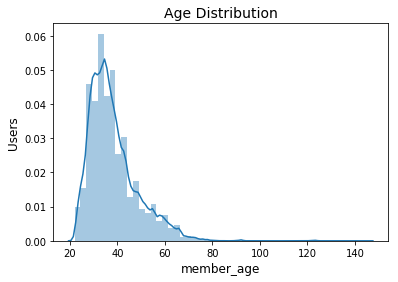

In [15]:
plotchart('Age Distribution', 'age', 'Users', )

sb.distplot(bikes_data['member_age'])

#### The distribution above is skewed to the right and it is unimodai. It is obvius that the highest distributions is at the ages between 25 - 40.

## what is the age range most users fall

Text(0.5,1,'Users Age Range')

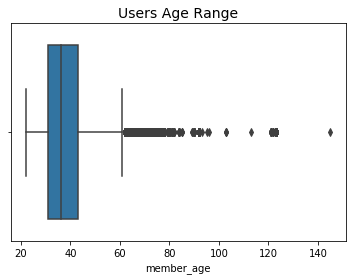

In [16]:
sb.boxplot(x=bikes_data['member_age']);
plt.title('Users Age Range', fontsize = 14)

#### The age range most users fall in the bike sharing company is between the age of 25 to 60. All ages above 60 are outliers.

In [17]:
# checking for the number of outlier rows

(bikes_data['member_age'] > 60).value_counts()

False    168216
True       6736
Name: member_age, dtype: int64

In [18]:
# dropping the outliers

bikes_data = bikes_data[bikes_data['member_age'] <60]

# check if the change was effective

(bikes_data['member_age']>60).value_counts()

False    167065
Name: member_age, dtype: int64

### User Type Percentage

In [39]:
bikes_data['user_type'].value_counts()

Subscriber    151072
Customer       15993
Name: user_type, dtype: int64

Text(0.5,1,'Percentage of the User Type')

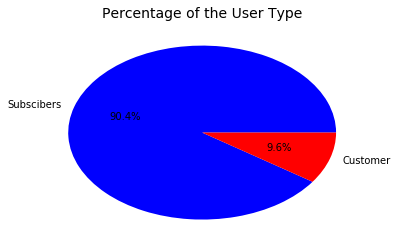

In [42]:
data = bikes_data['user_type'].value_counts()
labels = ['Subscibers', 'Customer']
colors = ['blue', 'Red']
plt.pie(data, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title('Percentage of the User Type', fontsize = 14)

#### from the chart above over 90 percent of the users are Subcribers  while few  of the users are just

### Gender That Uses The Bikes More Frequenrtly

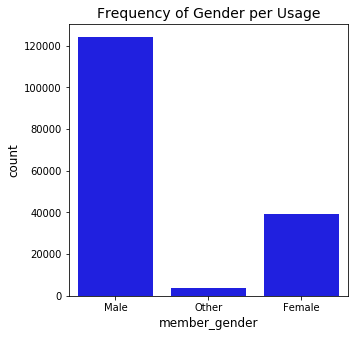

In [20]:
plt.figure(figsize = [5,5])
plotchart('Frequency of Gender per Usage', 'Gender', 'Frequency')
sb.countplot(bikes_data['member_gender'],  color = 'blue');

#### From the chart above, majority of the users are males, with huge diffenrece compare to the females users. The least users are the other genders

### start time distribution

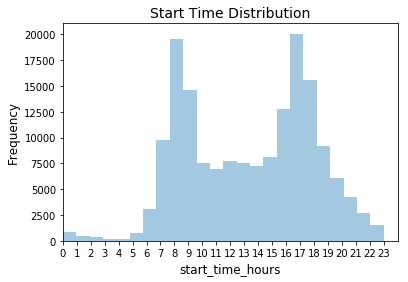

In [21]:
plotchart('Start Time Distribution', 'Time of the Day', 'Frequency')
hours = np.arange(0,24)
sb.distplot(bikes_data['start_time_hours'], kde = False, bins = 24)
plt.xlim(0, 24)
plt.xticks(hours);

#### From the above distribution, the bike rides are most likely to start at 8:00 am and 5:00 pm durint the day

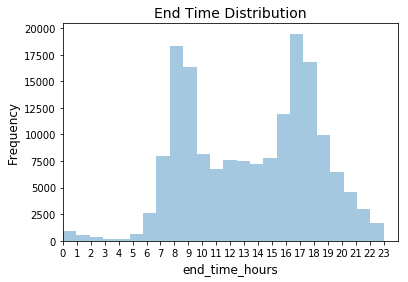

In [22]:
plotchart('End Time Distribution', 'Time of the Day', 'Frequency')
hours = np.arange(0,24)
sb.distplot(bikes_data['end_time_hours'], kde = False, bins = 24)
plt.xlim(0, 24)
plt.xticks(hours);

#### From the above distribution, the bike rides are most likely to end at 8:00 - 9:00am and 17:00 - 1800 pm during the day

### Top 10 start stations with the highest trip

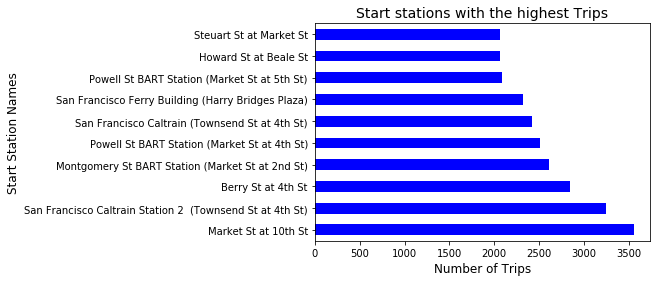

In [23]:
bikes_data.groupby('start_station_name').agg('count')['bike_id'].sort_values(ascending=False).head(10).plot(kind= 'barh', color= 'blue')

plotchart('Start stations with the highest Trips', 'Number of Trips', 'Start Station Names')

#### The plot above shows the top 10 start station names and majority of the trip start at the 'Market St at 10th st'

### Top 10 stations where most trip ends

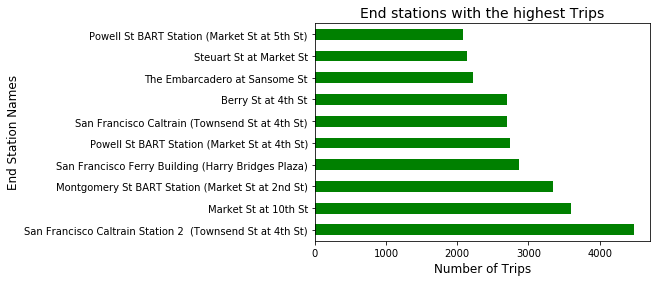

In [24]:
bikes_data['end_station_name'].value_counts()[:10].plot(kind = 'barh', color = 'green',)

plotchart('End stations with the highest Trips', 'Number of Trips', 'End Station Names')

#### The plot above displays the top 10 end stations and most of the trip ended at the 'San Francisco Caltrain 2 (Townsend St at 4th St)'

### In what day of the week are the bikes bikes used the most

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

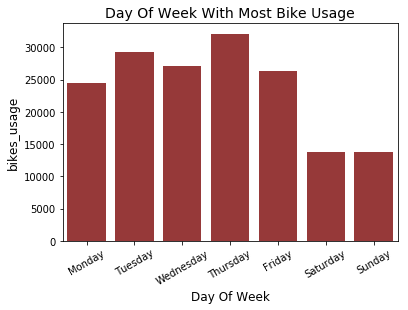

In [25]:
sb.countplot(data = bikes_data, x = 'week_day', color = 'brown')
plotchart('Day Of Week With Most Bike Usage', 'Day Of Week', 'bikes_usage')
plt.xticks(rotation=30)

The bikes are mostly use during week day with the highes usage on thurdays. The bikes are less used during the weekends.

### What age qrooup are the most users of the the bikes

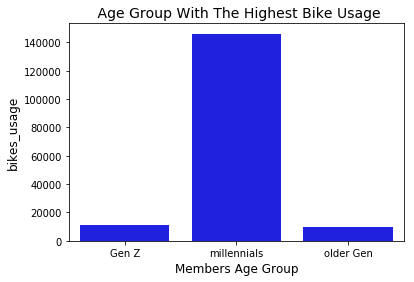

In [26]:
sb.countplot(data = bikes_data, x = 'age_group', color = 'blue')
plotchart(' Age Group With The Highest Bike Usage', 'Members Age Group', 'bikes_usage')

mot users of the bikes are the milenials age then the older generation and genz having almost same number of users

### what percentage of the bikes were shared

In [36]:
bikes_data['bike_share_for_all_trip'].value_counts()

No     150838
Yes     16227
Name: bike_share_for_all_trip, dtype: int64

Text(0.5,1,'Percentage of shared bikes for all trips')

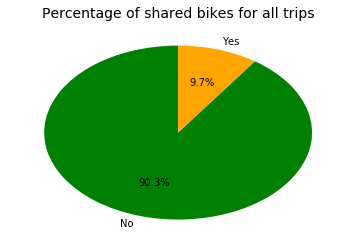

In [46]:
data = bikes_data['bike_share_for_all_trip'].value_counts()
labels = ['No', 'Yes']
colors = ['green', 'orange']
plt.pie(data, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90)
plt.title('Percentage of shared bikes for all trips', fontsize = 14)

Over 90% of the bikes were  not shared during the trips

### Investigation Outcomes
> There weere unusual points especially with the membership age. The ages above 60 in the membership age were outliers and they were all droped in orther to ensure an accurate analysis. I waas able to analyze most of the variables independently and below are my fidings:

* The age distribution is right skwed and unimodal, also, the distribution is more between the age of 25-40
* Most of the members age range falls between the age of 25 to 60
* The male genders are the most users
* Over  of the trips were not shared
* The milenials age group use the bikes the most
* The bikes are used mostly on thursday
* Majority of the trip start at the 'Market St at 10th st' station
* Most bike trips ends at the 'San Francisco Caltrain 2 (Townsend St at 4th St)' station
* Over 90% of the bike users are subcribers
* Most trips are likely to start at 8:00-9:00am and 4:00-5:00pm, and ends at 8:00-9:00am and 4:00-5:00pm.


> In the course of tidying the data sets, There was an unusual distribution in the membership ages and I was able to drop the outliers to ensure accurate statistical analysis. I also performed fome feature engineering on the data set so that I can discover more trends and patterns in all variables.

## Bivariate Exploration



### What the Relationship Between  the members gender and  the members age group

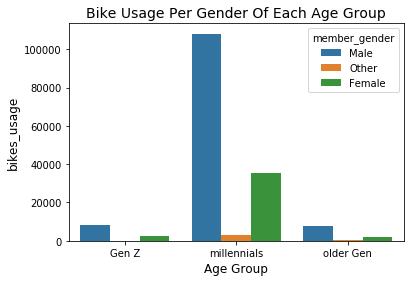

In [47]:
sb.countplot(data = bikes_data, x = 'age_group', hue = 'member_gender')
plotchart('Bike Usage Per Gender Of Each Age Group', 'Age Group', 'bikes_usage')

In each age group, the male genders are the dorminant users of the bikes followed bu the female gender, and it was also observed that the other gender of the genz age group have insignificant or no record of the bike usage. 

### Whisch day of the week are the bikes  shared the most for all trips

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

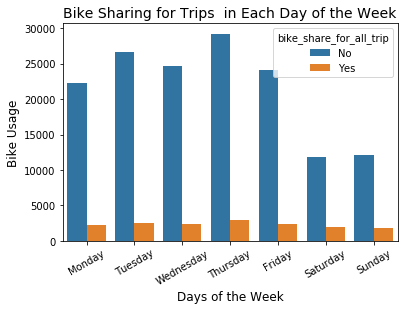

In [45]:
sb.countplot(data =bikes_data, x = 'week_day', hue = 'bike_share_for_all_trip')
plotchart('Bike Sharing for Trips  in Each Day of the Week', 'Days of the Week', 'Bike Usage')
plt.xticks(rotation = 30)

It was obsered that in each day of the week, the bikes are less shared

In [30]:
bikes_data['bike_share_for_all_trip'].value_counts()

No     150838
Yes     16227
Name: bike_share_for_all_trip, dtype: int64

### Investigation Relationships
From my analysis, I observed that the males are the predominant users of the bikes irrespective of the day of the week. Also, the other gender genz age group have no record for using the bikes

Also, I observed that gender have a strong impact in the bike usage

## Multivariate Exploration



### User type of each gender in various ages

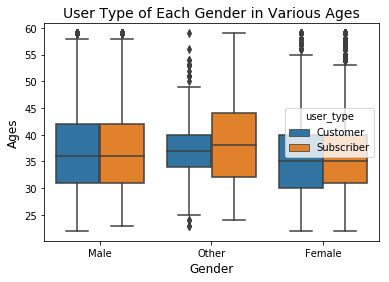

In [44]:
sb.boxplot( data=bikes_data, x="member_gender", y="member_age", hue="user_type")
plotchart('User Type of Each Gender in Various Ages', 'Gender', 'Ages');


The male gender same number of user type, for the other gender most of the users are subcribers while the female gender also have almost equal number of customers and subscribers

### Which Gender are more likely to share the bikes in different age group

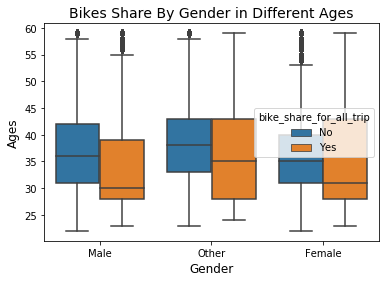

In [32]:
 sb.boxplot( data=bikes_data, x="member_gender", y="member_age", hue="bike_share_for_all_trip")
plotchart('Bikes Share By Gender in Different Ages', 'Gender', 'Ages');

The female genders and the other gender are more open to bike sharing than the male gender

### Multivariate Investigation Relationships

There is a relationship between the bike sharing and gender.The male gender use the bikes more but share less, the female gender and the other gender use the bikes less but tends to shaer more

> I also obsereved that the median age of all the gender are above 30

## Conclusions
 After a carefull analysis of the NewYork bike sharing data set, I was able to find trends and patterns  and also discovered some of the factors that affects the bike sharing system. factors like age, gender, affect the usage of the bikes and the male genders are the predominant users. Most users fall between the age of 25 to 45 and are more of subcribers than customerss and most of the bikes are not likely to be shared during the trips.

In [33]:
bikes_data.to_csv('bikes_share_data.csv', index=False)